# Part 3: Collaborative Filtering Recommender System

## Section A: Introduction

**(Dataset)**: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

### Collaborative Filtering Recommender Systems

▪ Collaborative filtering recommender systems do not require metadata like its content-based counterparts.

▪ These systems try to predict the rating or preference that a user would give an item based on past interactions (ratings and preferences) recorded between users and items in order to produce new recommendations. 

<img src="collaborative.png" width="350">

▪ These interactions are stored in the so-called "user-item interactions matrix".

▪ A user-to-item matrix comprises individual users in the rows and individual elements in the columns. 

<img src="matrix.png" width="600">

▪ Therefore, recommendation systems based on collaborative filtering can be categorized into two ways: **Item-based** and **User-based**.

## Section B: Walkthrough Examples

### groupby()

▪ DataFrame.groupby() function is used to collect the identical data into groups and perform **aggregate** functions on the grouped data. 

▪ Group by operation involves splitting the data, applying some functions, and finally aggregating the results.

<img src="groupby.png" width="800">

https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/

### Aggregation Functions

▪ count() – Number of non-null observations

▪ sum() – Sum of values

▪ mean() – Mean of values

▪ median() – Arithmetic median of values

▪ min() – Minimum

▪ max() – Maximum

https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/

### Example 1

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [3]:
import pandas as pd

df_test = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot'], 
                        'Max Speed': [380., 370., 24., 26.]})
df_test

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


### Calculating the occurrences of values

In [2]:
df_test.groupby(['Animal']).count()

,Max Speed
Animal,
Falcon,2
Parrot,2


In [3]:
df_test.groupby(['Animal']).agg({"Max Speed": "count"})

,Max Speed
Animal,
Falcon,2
Parrot,2


### Calculating the mean of values

In [4]:
df_test.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


### Calculating the median of values

In [5]:
df_test.groupby(['Animal']).median()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


### Calculating the sum of values

In [6]:
df_test.groupby(['Animal']).sum()

,Max Speed
Animal,
Falcon,750.0
Parrot,50.0


### Calculating the min of values

In [7]:
df_test.groupby(['Animal']).min()

,Max Speed
Animal,
Falcon,370.0
Parrot,24.0


### Calculating the max of values

In [8]:
df_test.groupby(['Animal']).max()

,Max Speed
Animal,
Falcon,380.0
Parrot,26.0


### Example 2

https://sparkbyexamples.com/pyspark/pandas-api-on-apache-spark-pyspark/

In [10]:
technologies = ({'Courses':["Spark", "PySpark", "Hadoop", "Python", "Pandas", "Hadoop", "Spark", "Python", "NA"],
                 'Fee':[22000, 25000, 23000, 24000, 26000, 25000, 25000, 22000, 1500],
                 'Days':[30, 50, 55, 40, 60, 35, 30, 50, 40],
                 'Discount':[1000, 2300, 1000, 1200, 2500, None, 1400, 1600, 0]})

df_test = pd.DataFrame(technologies)
df_test

,Courses,Fee,Days,Discount
0,Spark,22000,30,1000.0
1,PySpark,25000,50,2300.0
2,Hadoop,23000,55,1000.0
3,Python,24000,40,1200.0
4,Pandas,26000,60,2500.0
5,Hadoop,25000,35,NaN
6,Spark,25000,30,1400.0
7,Python,22000,50,1600.0
8,NA,1500,40,0.0


### Calculating the sum of values

In [11]:
df_test.groupby(['Courses']).sum()

,Fee,Days,Discount
Courses,,,
Hadoop,48000,90,1000.0
NA,1500,40,0.0
Pandas,26000,60,2500.0
PySpark,25000,50,2300.0
Python,46000,90,2800.0
Spark,47000,60,2400.0


### Removing Sorting

In [12]:
df_test.groupby(by = ['Courses'], sort = False).sum()

,Fee,Days,Discount
Courses,,,
Spark,47000,60,2400.0
PySpark,25000,50,2300.0
Hadoop,48000,90,1000.0
Python,46000,90,2800.0
Pandas,26000,60,2500.0
NA,1500,40,0.0


### Sorting Grouped Keys by Specific Column

In [13]:
# Sorting group keys on descending order by Fee
df_test.groupby('Courses').sum().sort_values('Fee', ascending = False)

,Fee,Days,Discount
Courses,,,
Hadoop,48000,90,1000.0
Spark,47000,60,2400.0
Python,46000,90,2800.0
Pandas,26000,60,2500.0
PySpark,25000,50,2300.0
NA,1500,40,0.0


In [14]:
df_test.groupby('Courses').sum().sort_values('Days', ascending = False)

,Fee,Days,Discount
Courses,,,
Hadoop,48000,90,1000.0
Python,46000,90,2800.0
Pandas,26000,60,2500.0
Spark,47000,60,2400.0
PySpark,25000,50,2300.0
NA,1500,40,0.0


### Using groupby() onto Two or More Columns

In [19]:
df_test.groupby(['Courses', 'Days']).sum()

Fee  Discount
Courses Days                 
Hadoop  35    25000       0.0
        55    23000    1000.0
NA      40     1500       0.0
Pandas  60    26000    2500.0
PySpark 50    25000    2300.0
Python  40    24000    1200.0
        50    22000    1600.0
Spark   30    47000    2400.0

### Making the Courses as Indexes

In [20]:
df_test_2 = df_test.groupby(['Courses'])['Fee'].min()
df_test_2

Courses
Hadoop     23000
NA          1500
Pandas     26000
PySpark    25000
Python     22000
Spark      22000
Name: Fee, dtype: int64

In [21]:
df_test_2.index

Index(['Hadoop', 'NA', 'Pandas', 'PySpark', 'Python', 'Spark'], dtype='object', name='Courses')

### Resetting the Index Values as Indexes

In [22]:
df_test_2 = df_test.groupby(['Courses'])['Fee'].min().reset_index()
df_test_2

,Courses,Fee
0,Hadoop,23000
1,NA,1500
2,Pandas,26000
3,PySpark,25000
4,Python,22000
5,Spark,22000


In [23]:
df_test_2.index

RangeIndex(start=0, stop=6, step=1)

### Applying Multiple Functions onto a Column

In [24]:
df_test.groupby(['Courses'])['Fee'].aggregate(['min', 'max'])

,min,max
Courses,,
Hadoop,23000,25000
NA,1500,1500
Pandas,26000,26000
PySpark,25000,25000
Python,22000,24000
Spark,22000,25000


In [25]:
df_test.groupby(['Courses'])['Fee'].agg(['min', 'max'])

,min,max
Courses,,
Hadoop,23000,25000
NA,1500,1500
Pandas,26000,26000
PySpark,25000,25000
Python,22000,24000
Spark,22000,25000


In [26]:
df_test.groupby('Courses').aggregate({'Days':'count', 'Fee':['min','max']})

Days    Fee       
        count    min    max
Courses                    
Hadoop      2  23000  25000
NA          1   1500   1500
Pandas      1  26000  26000
PySpark     1  25000  25000
Python      2  22000  24000
Spark       2  22000  25000

### Applying Multiple Functions and Naming the Output Columns

In [27]:
df_test.groupby('Courses').agg(Days_Count = ('Days', 'count'), Min_Fee = ('Fee', 'min'), Max_Fee = ('Fee', 'max'))

,Days_Count,Min_Fee,Max_Fee
Courses,,,
Hadoop,2,23000,25000
NA,1,1500,1500
Pandas,1,26000,26000
PySpark,1,25000,25000
Python,2,22000,24000
Spark,2,22000,25000


## Section C: Datasets Loading

▪ This exercise involves the use of "file.tsv" and "Movie_Id_Titles.csv" datasets.

▪ "file.tsv" contains 100,003 rows of records that store the user ratings.

### Loading Data into DataFrame

In [28]:
import pandas as pd 

df = pd.read_csv('file.tsv', sep = '\t') 
df

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116
...,...,...,...,...
99997,880,476,3,880175444
99998,716,204,5,879795543
99999,276,1090,1,874795795
100000,13,225,2,882399156


### Loading Data into DataFrame without Header

In [4]:
# file.tsv is tab-separated values file
df = pd.read_csv('file.tsv', sep = '\t', header = None) 
df

,0,1,2,3
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


### Creating Labels for Columns in DataFrame

In [5]:
df.columns = ['user_id', 'item_id', 'rating', 'timestamp'] 
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


### Loading Movie_Id_Titles.csv into DataFrame

▪ "Movie_Id_Titles.csv" contains 1682 movie titles associated with their item_id.

In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv') 
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


### Merging Two DataFrames Together based on item_id

In [7]:
data = pd.merge(df, movie_titles, on = 'item_id', sort = True) 
data

,user_id,item_id,rating,timestamp,title
0,308,1,4,887736532,Toy Story (1995)
1,287,1,5,875334088,Toy Story (1995)
2,148,1,4,877019411,Toy Story (1995)
3,280,1,4,891700426,Toy Story (1995)
4,66,1,3,883601324,Toy Story (1995)
...,...,...,...,...,...
99998,863,1678,1,889289570,Mat' i syn (1997)
99999,863,1679,3,889289491,B. Monkey (1998)
100000,863,1680,2,889289570,Sliding Doors (1998)
100001,896,1681,3,887160722,You So Crazy (1994)


In [8]:
data = pd.merge(df, movie_titles, on = 'item_id', sort = False) 
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


### iloc

▪ The iloc() function enables us to select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

In [9]:
data.iloc[580:620]

,user_id,item_id,rating,timestamp,title
580,886,50,5,876031501,Star Wars (1977)
581,739,50,4,886958895,Star Wars (1977)
582,903,50,5,891031329,Star Wars (1977)
583,780,50,5,891363685,Star Wars (1977)
584,0,172,5,881250949,"Empire Strikes Back, The (1980)"
585,213,172,5,878955442,"Empire Strikes Back, The (1980)"
586,92,172,4,875653271,"Empire Strikes Back, The (1980)"
587,77,172,3,884752562,"Empire Strikes Back, The (1980)"
588,194,172,3,879521474,"Empire Strikes Back, The (1980)"
589,230,172,4,880484523,"Empire Strikes Back, The (1980)"


## Section D: Data Exploration

### Grouping Movies by Titles + Applying the Count Function

In [10]:
df_rating = data.groupby('title').count()
df_rating.head()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41


In [11]:
df_rating = data.groupby('title')['rating'].count()
df_rating.head()

title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: rating, dtype: int64

### loc

▪ Use loc to select rows from dataframe based on specified conditions: **df.loc[df["column name"] condition]**

In [37]:
data.loc[data['item_id'] == 1300]

,user_id,item_id,rating,timestamp,title
97446,223,1300,1,891550470,'Til There Was You (1997)
97447,178,1300,3,886678518,'Til There Was You (1997)
97448,342,1300,1,875318556,'Til There Was You (1997)
97449,530,1300,2,890627207,'Til There Was You (1997)
97450,416,1300,3,886315494,'Til There Was You (1997)
97451,152,1300,4,886535827,'Til There Was You (1997)
97452,782,1300,2,891499469,'Til There Was You (1997)
97453,299,1300,2,877878382,'Til There Was You (1997)
97454,532,1300,3,888632446,'Til There Was You (1997)


In [38]:
data.loc[data['title'].str.contains('Til There Was')]

,user_id,item_id,rating,timestamp,title
97446,223,1300,1,891550470,'Til There Was You (1997)
97447,178,1300,3,886678518,'Til There Was You (1997)
97448,342,1300,1,875318556,'Til There Was You (1997)
97449,530,1300,2,890627207,'Til There Was You (1997)
97450,416,1300,3,886315494,'Til There Was You (1997)
97451,152,1300,4,886535827,'Til There Was You (1997)
97452,782,1300,2,891499469,'Til There Was You (1997)
97453,299,1300,2,877878382,'Til There Was You (1997)
97454,532,1300,3,888632446,'Til There Was You (1997)


### Grouping Movies by Titles + Calculating Rating's Means + Viewing Ratings 

In [39]:
# Version 1
data.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [40]:
# Version 2
data.groupby('title')['rating'].agg('mean')

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [41]:
# Version 3
data.groupby(by = ['title'])['rating'].agg('mean')

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [42]:
# Create a dataframe as the output instead of a series
pd.DataFrame(data.groupby(by = ['title'])['rating'].agg('mean'))

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


### Grouping Movies by Titles + Calculating Rating's Means + Viewing Ratings in Descending Order

▪ Add sort_values() to groupby() to change the sort order descendingly by the mean value of rating column

In [43]:
data.groupby('title')['rating'].mean().sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

### Grouping Movies by Titles + Viewing Rating's Count in Descending Order

In [44]:
data.groupby('title')['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

### Grouping Movies by Titles + Viewing Rating in Descending Order

In [45]:
data.groupby('title').agg(rating = ('rating', 'mean'), vote = ('rating', 'sum')).sort_values(by = 'vote', ascending = False)

,rating,vote
title,,
Star Wars (1977),4.359589,2546
Fargo (1996),4.155512,2111
Return of the Jedi (1983),4.007890,2032
Contact (1997),3.803536,1936
Raiders of the Lost Ark (1981),4.252381,1786
...,...,...
T-Men (1947),1.000000,1
JLG/JLG - autoportrait de décembre (1994),1.000000,1
Careful (1992),1.000000,1


In [46]:
data.groupby('title').agg(rating = ('rating', 'mean'), vote = ('rating', 'sum')).sort_values(by = ['rating', 'vote'], ascending = False)

,rating,vote
title,,
Prefontaine (1997),5.0,15
Star Kid (1997),5.0,15
"Saint of Fort Washington, The (1993)",5.0,10
Santa with Muscles (1996),5.0,10
Aiqing wansui (1994),5.0,5
...,...,...
"Very Natural Thing, A (1974)",1.0,1
"Vie est belle, La (Life is Rosey) (1987)",1.0,1
Wend Kuuni (God's Gift) (1982),1.0,1


### Data Visualization with Histogram

▪ Use a histogram to check out the number of ratings received against the count where bins = number of bins (how many bars to be displayed).

<img src="bins.png" width="500">

### Creating a Rating DataFrame

In [47]:
df_rating = data.groupby('title').agg(avg_rating = ('rating', 'mean'), no_ratings = ('rating', 'sum'))
df_rating

,avg_rating,no_ratings
title,,
'Til There Was You (1997),2.333333,21
1-900 (1994),2.600000,13
101 Dalmatians (1996),2.908257,317
12 Angry Men (1957),4.344000,543
187 (1997),3.024390,124
...,...,...
Young Guns II (1990),2.772727,122
"Young Poisoner's Handbook, The (1995)",3.341463,137
Zeus and Roxanne (1997),2.166667,13


### Question: What can be observed from the histogram displayed below?

<AxesSubplot:>

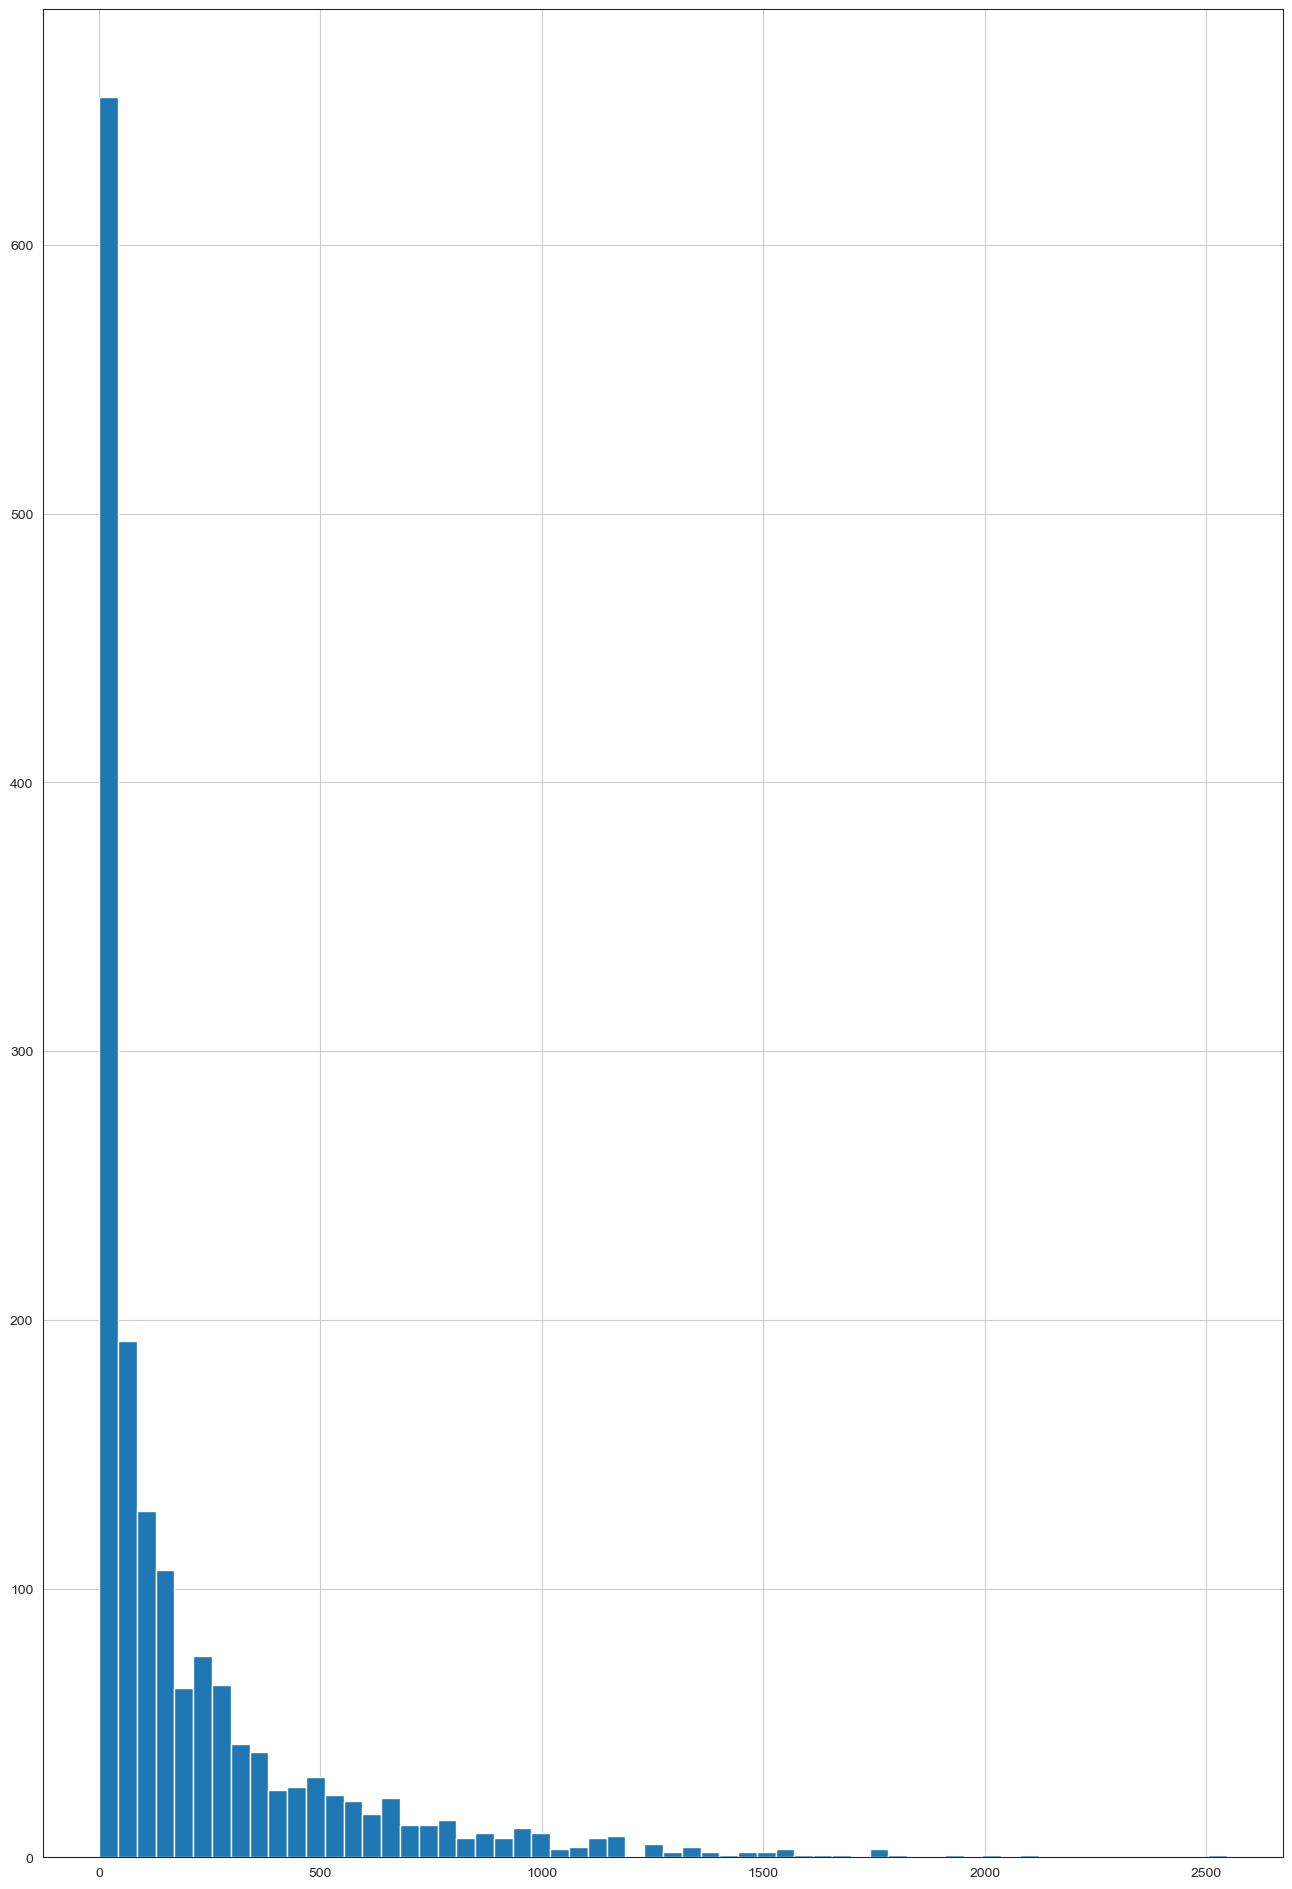

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 
 
# Plot graph of 'num of ratings column' 
plt.figure(figsize = (16, 24)) 
  
df_rating['no_ratings'].hist(bins = 60) 

### Question: What can be observed from the histogram displayed below?

<AxesSubplot:>

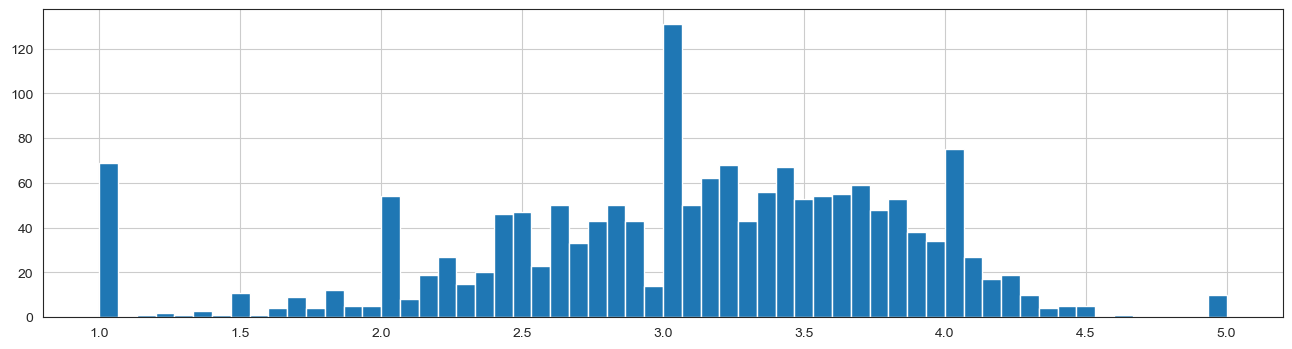

In [49]:
# Plot graph of 'ratings' column 
plt.figure(figsize = (16, 4)) 
  
df_rating['avg_rating'].hist(bins = 60) 

## Section E: Building User-Item Interactions Matrix

▪ User-item matrix is a basic foundation of traditional collaborative filtering techniques. 

▪ The rating for a target movie item for an active user can be predicted by using a simple weighted average (mean). 

▪ We are going to transform the data into a user-to-item matrix, where each row represents one customer and the columns correspond to different products.

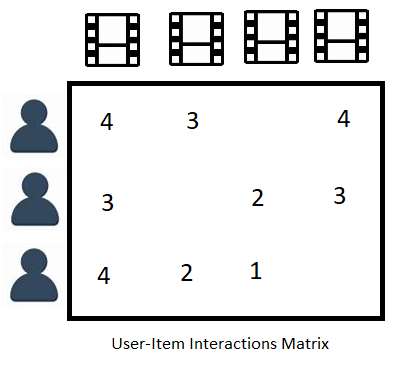

In [12]:
user_movie_matrix = data.pivot_table(index = 'user_id', columns = ['title'], values = 'rating')
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
user_movie_matrix = data.pivot_table(index = 'user_id', columns = ['title'], values = 'rating').fillna(0)
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Building Item-based Collaborative Filtering (Part 1)

▪ Item-based collaborative filtering is the recommendation system to use the similarity between items based on the ratings given by users.

### Identifying Users who Rated a Given Movie

https://practicaldatascience.co.uk/data-science/how-to-create-a-collaborative-filtering-recommender-system

In [52]:
users_ratings = user_movie_matrix['101 Dalmatians (1996)']
users_ratings.head(10)

user_id
0    0.0
1    2.0
2    0.0
3    0.0
4    0.0
5    2.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: 101 Dalmatians (1996), dtype: float64

In [53]:
users_ratings = user_movie_matrix['Young Guns (1988)']
users_ratings.head(10)

user_id
0    0.0
1    3.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    3.0
8    0.0
9    0.0
Name: Young Guns (1988), dtype: float64

In [54]:
users_ratings = user_movie_matrix['Star Wars (1977)']
users_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    0.0
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

### Finding Correlations between A Selected Movie and All Other Movies

▪ We can find the correlations of all movies against our target movie ('Star Wars (1977)') using the Pandas **corrwith()** function

▪ If the item-based recommender system finds a high correlation, then it assumes similarity between movies.

▪ **corrwith()** computes a pairwise correlation of the the rated movie series (or vector) with all of the other movies and returns the movies which have the most ratings in common. 

▪ The syntax of the corrwith() is: DataFrame.corrwith(other, axis=0, drop=False, method='pearson')

▪ axis refers to the axis to be used, where 0 refers to **column-wise** computation, and 1 refers to **row-wise**. 

https://www.educative.io/answers/what-is-corrwith-function-in-pandas

In [55]:
similar_movies = user_movie_matrix.corrwith(users_ratings)
similar_movies

title
'Til There Was You (1997)               -0.009011
1-900 (1994)                            -0.009067
101 Dalmatians (1996)                    0.155314
12 Angry Men (1957)                      0.212583
187 (1997)                              -0.034787
                                           ...   
Young Guns II (1990)                     0.137382
Young Poisoner's Handbook, The (1995)   -0.002939
Zeus and Roxanne (1997)                 -0.007807
unknown                                  0.034445
Á köldum klaka (Cold Fever) (1994)       0.019045
Length: 1664, dtype: float64

In [56]:
# Create a dataframe with similar movies as the index column and name another column as correlation
similar_movies = pd.DataFrame(similar_movies, columns = ['correlation'])
similar_movies.head(10)

,correlation
title,
'Til There Was You (1997),-0.009011
1-900 (1994),-0.009067
101 Dalmatians (1996),0.155314
12 Angry Men (1957),0.212583
187 (1997),-0.034787
2 Days in the Valley (1996),0.098194
"20,000 Leagues Under the Sea (1954)",0.219802
2001: A Space Odyssey (1968),0.315657
3 Ninjas: High Noon At Mega Mountain (1998),0.003373


### Recommending The Most Similar Movies

▪ If we sort the movies in descending order of correlation with our target film, we get back a list of the ones which are highly correlated. 

▪ As the correlation will be higher we can use them as our recommendation.

In [57]:
similar_movies.sort_values(by = 'correlation', ascending = False).head(10)

,correlation
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
Toy Story (1995),0.456219
"Terminator, The (1984)",0.437866
Back to the Future (1985),0.419493
Alien (1979),0.412516


### Recommending The Most Similar Popular Movies 

▪ Although they are highly correlated, it is unsure whether they are popular movies or not.

▪ Assuming that the more votes a movie has, the more popular it is, therefore, to find out whether they are strong or weak recommendations, the number of ratings have to be taken into consideration

In [60]:
similar_movies.head(10)

,correlation
title,
'Til There Was You (1997),-0.009011
1-900 (1994),-0.009067
101 Dalmatians (1996),0.155314
12 Angry Men (1957),0.212583
187 (1997),-0.034787
2 Days in the Valley (1996),0.098194
"20,000 Leagues Under the Sea (1954)",0.219802
2001: A Space Odyssey (1968),0.315657
3 Ninjas: High Noon At Mega Mountain (1998),0.003373


In [61]:
df_rating = pd.DataFrame(data.groupby('title')['rating'].count())  
df_rating.head(10)

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
2 Days in the Valley (1996),93
"20,000 Leagues Under the Sea (1954)",72
2001: A Space Odyssey (1968),259
3 Ninjas: High Noon At Mega Mountain (1998),5


In [62]:
similar_movies = similar_movies.join(df_rating['rating']).sort_values(by = 'correlation', ascending = False)
similar_movies

,correlation,rating
title,,
Star Wars (1977),1.000000,584
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331
...,...,...
Anna Karenina (1997),-0.116310,33
"Smile Like Yours, A (1997)",-0.120460,25
I Know What You Did Last Summer (1997),-0.132151,100


### Recommending 20 Most Similar Popular Movies 

In [63]:
# Similar movies like starwars 
similar_movies_2 = similar_movies[similar_movies['rating'] > 100].sort_values(by = 'correlation', ascending = False)
similar_movies_2.head(20)

,correlation,rating
title,,
Star Wars (1977),1.000000,584
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331
Toy Story (1995),0.456219,452
"Terminator, The (1984)",0.437866,301
Back to the Future (1985),0.419493,350
Alien (1979),0.412516,291


### Building User-based Collaborative Filtering (Part 2)

▪ User-based collaborative filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user. 

In [14]:
user_movie_matrix = data.pivot_table(index = 'user_id', columns = ['title'], values = 'rating').fillna(0)
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
movie_user_matrix = user_movie_matrix.transpose()
movie_user_matrix.head(10)

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 Days in the Valley (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"20,000 Leagues Under the Sea (1954)",0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,4.0,0.0,0.0,0.0,4.0,5.0,5.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3 Ninjas: High Noon At Mega Mountain (1998),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Identify Ratings for Movies per User

In [16]:
# Retrieving column with the label 2 by indexing operator
movie_ratings = movie_user_matrix[2]
movie_ratings.head(10)

title
'Til There Was You (1997)                      0.0
1-900 (1994)                                   0.0
101 Dalmatians (1996)                          0.0
12 Angry Men (1957)                            0.0
187 (1997)                                     0.0
2 Days in the Valley (1996)                    0.0
20,000 Leagues Under the Sea (1954)            0.0
2001: A Space Odyssey (1968)                   0.0
3 Ninjas: High Noon At Mega Mountain (1998)    1.0
39 Steps, The (1935)                           0.0
Name: 2, dtype: float64

In [17]:
# Retrieving column with the label 7 by indexing operator
movie_ratings = movie_user_matrix[7]
movie_ratings.head(10)

title
'Til There Was You (1997)                      0.0
1-900 (1994)                                   0.0
101 Dalmatians (1996)                          0.0
12 Angry Men (1957)                            4.0
187 (1997)                                     0.0
2 Days in the Valley (1996)                    0.0
20,000 Leagues Under the Sea (1954)            5.0
2001: A Space Odyssey (1968)                   5.0
3 Ninjas: High Noon At Mega Mountain (1998)    0.0
39 Steps, The (1935)                           4.0
Name: 7, dtype: float64

### Finding Correlations between A User and All Other Users

▪ We can find the correlations of all users against our target user ('user_id' = 0) using the Pandas **corrwith()** function. 

▪ This is done by first generating data of the number of movies rated together.

▪ If the user-based recommender system finds a high correlation, then it assumes similarity between users, and recommend movies based on similarity between users.

In [18]:
# This is to find correlation between users based on the ratings of movies
similar_users = movie_user_matrix.corrwith(movie_ratings)

# Create a dataframe with similar movies as the index column and correlation as another column
similar_users = pd.DataFrame(similar_users, columns = ['correlation'])
similar_users.head(10)

,correlation
user_id,
0,0.076502
1,0.322443
2,0.024438
3,-0.011691
4,0.040891
5,0.280048
6,0.401410
7,1.000000
8,0.231925


### Recommending Movies Based on The Most Similar User

▪ If we sort the users in descending order of correlation with our target user, we get back a list of the ones which are highly correlated. 

▪ As the correlation will be higher we can use them as our recommendation.

▪ The following code prints one user that is most similar to the selected user.

In [19]:
most_similar_users = similar_users.sort_values(by = 'correlation', ascending = False).iloc[1:11]
most_similar_users

,correlation
user_id,
650,0.571199
313,0.558313
406,0.531905
326,0.521575
846,0.518824
308,0.518163
194,0.517024
694,0.514004
843,0.511517


In [20]:
# Extract user_id of the most similar users
users = most_similar_users.index.values.tolist()
users[0]

650

In [21]:
recommendation = data[data['user_id'] == users[0]]
recommendation

,user_id,item_id,rating,timestamp,title
222,650,50,5,891372232,Star Wars (1977)
767,650,172,4,891369442,"Empire Strikes Back, The (1980)"
1081,650,133,4,891381546,Gone with the Wind (1939)
1943,650,474,4,891385315,Dr. Strangelove or: How I Learned to Stop Worr...
2160,650,265,4,891370031,"Hunt for Red October, The (1990)"
...,...,...,...,...,...
97859,650,565,3,891388266,Village of the Damned (1995)
98259,650,1247,1,891384110,Bad Girls (1994)
99224,650,1031,3,891369480,Lassie (1994)
99696,650,1474,3,891385288,Nina Takes a Lover (1994)


### DataFrame Slicing By Condition

▪ **Condition 1**: the most similar user

▪ **Condition 2**: rating > 0

https://www.codegrepper.com/code-examples/python/how+to+extract+the+data+with+certain+condition+in+pandas

In [22]:
recommendation = data.loc[(data['user_id'] == users[0]) & (data['rating'] > 0), ['title', 'rating']]
recommendation

,title,rating
222,Star Wars (1977),5
767,"Empire Strikes Back, The (1980)",4
1081,Gone with the Wind (1939),4
1943,Dr. Strangelove or: How I Learned to Stop Worr...,4
2160,"Hunt for Red October, The (1990)",4
...,...,...
97859,Village of the Damned (1995),3
98259,Bad Girls (1994),1
99224,Lassie (1994),3
99696,Nina Takes a Lover (1994),3


In [23]:
recommendation = data.loc[(data['user_id'] == users[0]) & (data['rating'] > 3), ['title', 'rating']]
recommendation

,title,rating
222,Star Wars (1977),5
767,"Empire Strikes Back, The (1980)",4
1081,Gone with the Wind (1939),4
1943,Dr. Strangelove or: How I Learned to Stop Worr...,4
2160,"Hunt for Red October, The (1990)",4
...,...,...
93209,Forbidden Planet (1956),4
93601,"Christmas Carol, A (1938)",4
94941,Spellbound (1945),4
95834,"Old Man and the Sea, The (1958)",4


## Exercise

Perform steps in <b>Section 3</b> to recommend similar movies to the user if he likes 

1) Liar Liar (1997)

2) Return of the Jedi (1983)